In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc
import pyneb as pn
from astropy import units as u
import os
import pandas as pd
from astropy import constants as const

x=np.arange(5000,8000,0.001)
t_x = np.arange(5000,8000,1)

total_f_ratio = 5.15
ratio_6560 = 6560.47 / 1025.27

def R_Flux(F0,lam,lam_i,del_lam_i, ratio , flux_L , eff , Fc):
    ff = (lam-lam_i)/(ratio*del_lam_i) 
    fl = F0*np.exp(-ff**2/2)  
    return ((fl) / ratio**2) * (eff * flux_L) + Fc

def Flux(F0,lam,lam_i,del_lam_i,Fc):
    ff = (lam-lam_i)/(del_lam_i) 
    fl = F0*np.exp(-ff**2 / 2)/np.sqrt(2*np.pi*del_lam_i**2) + Fc
    return fl

def Data_R_Flux(F0,lam,lam_i,del_lam_i,Fc):
    ff = (lam-lam_i)/(del_lam_i) 
    fl = F0*np.exp(-ff**2 / 2) + Fc
    return fl

def total_flux(f,x ,fc):
    ft = 0
    dx = x[1]- x[0]
    for ii, flux in enumerate(f) :
        ft += (flux-fc)*dx #*x[ii] 
    return ft

def test_flux(f,x):
    flux = f*x *np.sqrt(2*np.pi)
    return flux

In [3]:
NGC6741_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6741/cngc6741_3600s.0055.txt"
NGC6884_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6884/cngc6884_3600s.0055.txt"
NGC6886_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6886/ngc6886_2400s.0051.txt"
NGC6881_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/ngc6881/cngc6881_3300s.0054.txt"
H4_1_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/H_4_1.txt"
Hen2_447_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/Hen_2_447.txt"
Hu2_1_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/Hu_2_1.txt"
J900_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/J_900.txt"
M1_8_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/M_1_8.txt"
NGC2346_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/NGC_2346.txt"
NGC2392_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/NGC_2392.txt"
NGC3242_p = r"/home/jin/cloudy_Test/PNe.tar-20240415T105820Z-001/PNe/PNe/NGC_3242.txt"

In [4]:
direct = r"/home/jin/cloudy_Test/parameters"



files = os.listdir(direct)

txt_files = [file for file in files if file.endswith('result.txt')]


parameters_names = []
for file in txt_files:

    parts = file.split('_')

    if len(parts) > 1 and parts[1] == 's':
        parameters_name = parts[0] + parts[1]
    else:
        parameters_name = parts[0]
    
    parameters_names.append(parameters_name)

print(parameters_names)

['Hen2-447', 'NGC6886s', 'NGC2346', 'NGC6886', 'NGC6881', 'M1-8', 'NGC2392', 'Hu2-1s', 'H4-1', 'Hu2-1', 'NGC2392s', 'NGC6884', 'NGC3242', 'J900', 'J900s', 'NGC6741', 'NGC3242s']


In [5]:
for ii , name in enumerate(parameters_names):
    direct_p = direct + '/' + txt_files[ii]
    name_w = name.replace('-', '_')
    
    globals()[f'paramter_{name_w}']= pd.read_csv(direct_p,sep='\,',header=0,engine='python')

    globals()[f'Model_lam_{name_w}'] = globals()[f'paramter_{name_w}']['Wavelength']
    globals()[f'Model_flux_{name_w}'] = globals()[f'paramter_{name_w}']['Flux']

    globals()[f'F_c_{name_w}'] = globals()[f'paramter_{name_w}']['Continuum_Model']

    globals()[f'F_6527_{name_w}'] = globals()[f'paramter_{name_w}']['HeII_6527_Model']
    globals()[f'F_6545_{name_w}'] = globals()[f'paramter_{name_w}']['Raman_HeII_6545_Model']   

    globals()[f'F_6560_{name_w}'] = globals()[f'paramter_{name_w}']['He_6560_Model']
    globals()[f'F_6563_{name_w}'] = globals()[f'paramter_{name_w}']['Ha_6563_Model']
    globals()[f'F_6548_1_{name_w}'] = globals()[f'paramter_{name_w}']['NII_6548_1_Model']
    globals()[f'F_6548_2_{name_w}'] = globals()[f'paramter_{name_w}']['NII_6548_2_Model']

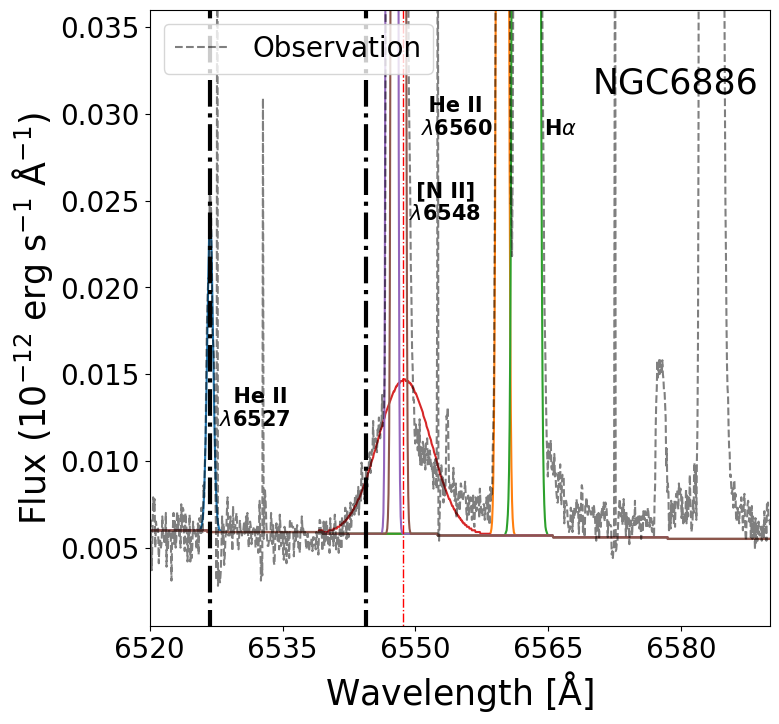

In [21]:
fig = plt.figure(1,figsize=(8,8))

name = 'NGC6886'
globals()[f'Model_lam_{name}'] = globals()[f'paramter_{name}']['Wavelength'].to_numpy()
globals()[f'Model_flux_{name}'] = globals()[f'paramter_{name}']['Flux'].to_numpy()

globals()[f'F_c_{name}'] = globals()[f'paramter_{name}']['Continuum_Model'].to_numpy()

globals()[f'F_6527_{name}'] = globals()[f'paramter_{name}']['HeII_6527_Model'].to_numpy() + globals()[f'F_c_{name}']
globals()[f'F_6545_{name}'] = globals()[f'paramter_{name}']['Raman_HeII_6545_Model'].to_numpy()   +globals()[f'F_c_{name}']

globals()[f'F_6560_{name}'] = globals()[f'paramter_{name}']['He_6560_Model'].to_numpy() +globals()[f'F_c_{name}']
globals()[f'F_6563_{name}'] = globals()[f'paramter_{name}']['Ha_6563_Model'].to_numpy() + globals()[f'F_c_{name}']
globals()[f'F_6548_1_{name}'] = globals()[f'paramter_{name}']['NII_6548_1_Model'].to_numpy() + globals()[f'F_c_{name}']
globals()[f'F_6548_2_{name}'] = globals()[f'paramter_{name}']['NII_6548_2_Model'].to_numpy() + globals()[f'F_c_{name}']


plt.plot(globals()[f'Model_lam_{name}'],globals()[f'F_6527_{name}'])
plt.plot(globals()[f'Model_lam_{name}'],globals()[f'F_6560_{name}'])
plt.plot(globals()[f'Model_lam_{name}'],globals()[f'F_6563_{name}'])
plt.plot(globals()[f'Model_lam_{name}'],globals()[f'F_6545_{name}'])
plt.plot(globals()[f'Model_lam_{name}'],globals()[f'F_6548_1_{name}'])
plt.plot(globals()[f'Model_lam_{name}'],globals()[f'F_6548_2_{name}'])
plt.plot(globals()[f'Model_lam_{name}'],globals()[f'Model_flux_{name}'],'k--',alpha=0.5,label='Observation')


x_p = np.argmax(globals()[f'F_6527_{name}'])
y_label = globals()[f'F_6527_{name}'].max()
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label+1,y_label*(0.5),'  He II \n$\lambda$6527',size=15,fontweight='bold')

x_p = np.argmax(globals()[f'F_6560_{name}'])
y_label = globals()[f'F_6527_{name}'].max()
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label-10,y_label*(1.2),'  He II \n $\lambda$6560 ',size=15,fontweight='bold')

x_p = np.argmax(globals()[f'F_6563_{name}'])
y_label = globals()[f'F_6527_{name}'].max()
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label + 2,y_label*(1.2),r'H$\alpha$',size=15,fontweight='bold')

x_p = np.argmax(globals()[f'F_6548_1_{name}'])
y_label = globals()[f'F_6527_{name}'].max()
x_label = globals()[f'Model_lam_{name}'][x_p]
plt.text(x_label+2,y_label*(0.995),' [N II]\n$\lambda$6548',size=15,fontweight='bold')

lam_0_6527= 6527.1
lam_0_6545 = 6544.7
del_lam = (lam_0_6545 - lam_0_6527 )

plt.axvline(x= globals()[f'Model_lam_{name}'][np.argmax(globals()[f'F_6545_{name}'])] ,ymin=-5,ymax=10,linestyle='dashdot',color='r',alpha=1,lw=1)

plt.axvline(x= globals()[f'Model_lam_{name}'][np.argmax(globals()[f'F_6527_{name}'])] ,ymin=-5,ymax=10,linestyle='dashdot',color='k',lw=3)
plt.axvline(x= globals()[f'Model_lam_{name}'][np.argmax(globals()[f'F_6527_{name}'])] +  del_lam ,ymin=-5,ymax=10,linestyle='dashdot',color='k',lw=3)
x_min,x_max = 6520,6590
y_max = globals()[f'F_6527_{name}'].max()
plt.ylabel(r'Flux ($10^{-12}$ erg s$^{-1}$ $ \rm \AA^{-1}$)',fontsize=25)
plt.xlabel(r'Wavelength $[\rm \AA]$',fontsize=25)
plt.xlim(x_min,x_max)
plt.ylim(5e-4,y_max*(1.5))
plt.xticks(np.arange(x_min,x_max,15),fontsize=20)
plt.yticks(fontsize=20)

plt.text(x_max-20,y_max*(1.3),f'{name}',size=25)
plt.legend(loc='upper left',fontsize=20)

In [7]:
x_p = np.argmax(globals()[f'F_6527_{name}'])
y_label = globals()[f'F_6527_{name}'].max()
x_label = globals()[f'Model_lam_{name}'][x_p]
print(x_label ,y_label)

6526.8579 0.024
